<a href="https://colab.research.google.com/github/zubaidak/Summer-Microcredential-Data-Analytics-/blob/main/Advertising_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the problem

#### The aim of this analysis is to show who clicked on an ad based on age, internet usage, and gender.

# Task 2: Load the Libraries

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Task 3: Load the Data

In [173]:
ad = pd.read_csv("https://raw.githubusercontent.com/zubaidak/ML-data/main/advertising.csv")

# Task 4: EDA (Exploratory Data Analysis)

In [174]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [175]:
ad.isnull()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [176]:
ad.isnull().value_counts()
# tells us there is no missing values

Daily Time Spent on Site  Age    Area Income  Daily Internet Usage  Ad Topic Line  City   Male   Country  Timestamp  Clicked on Ad
False                     False  False        False                 False          False  False  False    False      False            1000
dtype: int64

In [177]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [178]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Task 5: Data Visualization

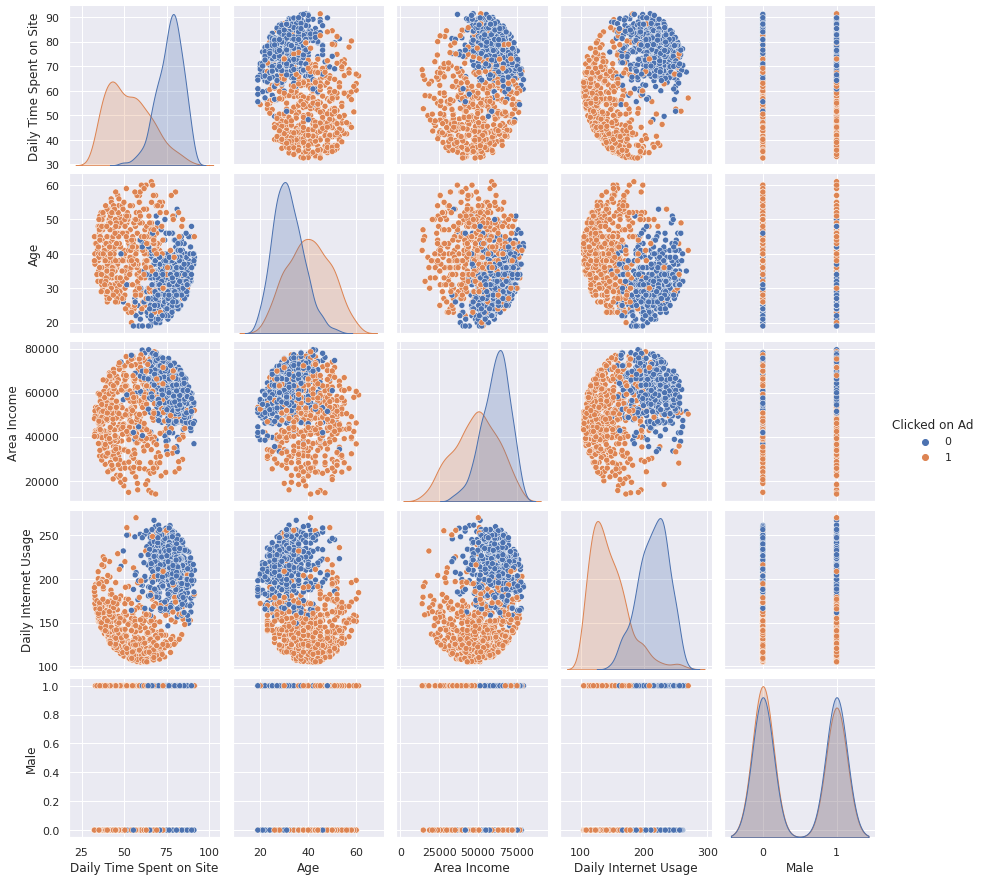

In [179]:
sns.pairplot(ad, hue='Clicked on Ad')
# an overview of all the columns based on the number of people who clicked on ad

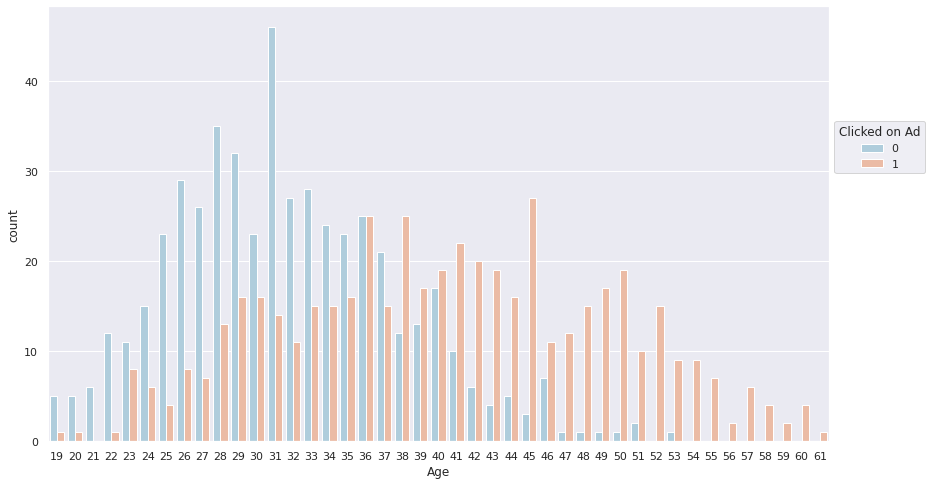

In [180]:
plt.figure(figsize=(14,8))
sns.countplot(x='Age',hue= 'Clicked on Ad', data=ad, palette='RdBu_r')
plt.legend(title = 'Clicked on Ad', bbox_to_anchor = (1, .75))
# This graph shows Age versus who clicked on an ad
# the lower the age, the lower amount of people who clicked on an ad
# the higher the age, the more people of clicked on an ad

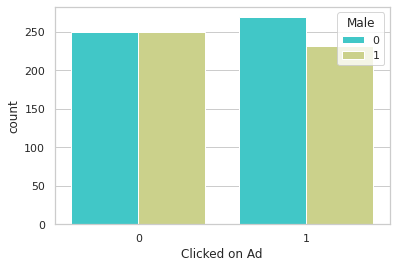

In [181]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', hue='Male', data=ad, palette='rainbow')
# the graph shows the difference between different genders who clicked on an ad

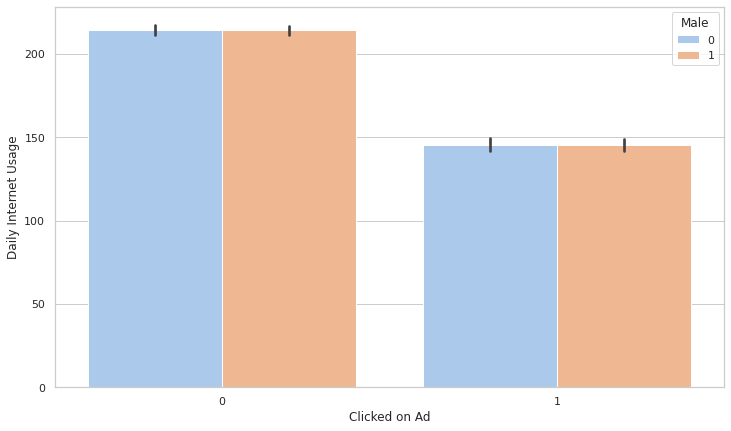

In [182]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Clicked on Ad', y='Daily Internet Usage', hue = 'Male', data=ad, palette='pastel')
# this bar graph shows the difference between gender and daily internet usuage versus who clicked on an ad
# once again, just like the graph above, it is easy to tell females clicked on an ad more than males

# Task 6: Train, Test, and Split



In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X = ad.iloc[:, [2, 3]].values
y = ad.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 0)

# Task 7: Feature Scaling

In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Task 8: Conduct the Logistic Regression on the Data

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
logmodel = LogisticRegression(random_state = 0)     # set logmel to logistic regression model
logmodel.fit(X_train, y_train)                      # train model based on .fit model

LogisticRegression(random_state=0)

# Task 9: Making Predictions

In [188]:
y_pred = logmodel.predict(X_test)
predictions = logmodel.predict(X_test)

In [189]:
print('The Prediction Acuracy of the model is ', logmodel.score(X_test, y_test))
pp = logmodel.predict(X_test)
print("Clicked on Ad", sum(pp!=0))
print("Did not click on Ad", sum(pp == 0))

The Prediction Acuracy of the model is  0.912
Clicked on Ad 122
Did not click on Ad 128


# Task 10: Evaluating the model

In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       136
           1       0.88      0.94      0.91       114

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



### Visualizing the Training set results

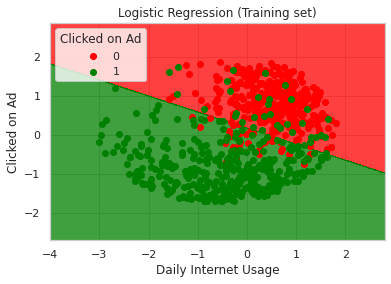

In [191]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logmodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Clicked on Ad')
plt.legend(title = 'Clicked on Ad')
plt.show()

### Visualizing the Test set results

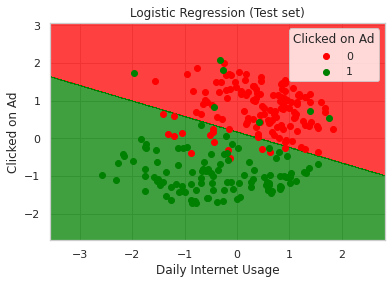

In [192]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logmodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Clicked on Ad')
plt.legend(title = 'Clicked on Ad')
plt.show()

# Conclusion

   After viewing the different graphs for the data of Ads, it is very clear that the Age, Internet usage, and Gender all play an important role by showing different trends. In the graph with Age vs Click on Ads, there is a noticible tendacacy for not clicking on ads the younger you are. The older the age is, there is a much higher rate of clicking on an ad. Another interesting example was the graph showing the effects of higher internet usage and gender vs clicked on ad or not. From that graph it can be concluded that Females with higher internet usuage are more likely to click on ads compared to males in the same situation.
   

   With the prediction models, the ad data had no missing values which helped increase the accuracy of the predictions to 91%. With this model it was predicted that 122 would click on an ad compared to 128 would not. This shows more people would not click on an ad rather than others that would. This makes sense since the age range of the data is from 19 being the lowest and 61 the highest, the median age is around 35-36 which is still young and shown to have a higher rate of people not clicking on an ad.